# Word Cloud generator
With this notebook you can generate some wordclouds rappresenting the most common words in the tweets.

Said tweets are taken from a csv and then they are cleaned from twitter specific stuff (links, emojies and so on)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re


### Loading the data

In [2]:
csvPath = './Data/tweetsUS.csv' #input Path
header_list = ["Id", "Date", "Lang", "Text"] #csv headers
tweets = pd.read_csv(csvPath, names=header_list)
tweets.head()

,Id,Date,Lang,Text
0,1227372076505264128,2020-02-11 23:21:21+00:00,en,b'UPDATE: 3-year-old Annabel Wucinski was take...
1,1227670752570347522,2020-02-12 19:08:11+00:00,en,b'Humanity must fight #COVID-19 AS ONE/STOP sa...
2,1228069539751092226,2020-02-13 21:32:49+00:00,en,b'@SenTomCotton For clarity the official name ...
3,1227824948699377664,2020-02-13 05:20:54+00:00,en,b'Interview w/ @CGTNOfficial on difficulties i...
4,1227757079282081793,2020-02-13 00:51:12+00:00,en,b'Coronavirus: Up To 24 Days Before Symptoms S...


### Selecting the wanted time period

In [3]:
print(f'Total number of tweets: {len(tweets)}')

start_date = '2020-04-15'
end_date = '2021-04-20'
mask = (tweets['Date'] >= start_date) & (tweets['Date'] <= end_date)
tweets = tweets.loc[mask]

print('# of tweets left: {}'.format(tweets.shape[0]))


Total number of tweets: 77173
# of tweets left: 48891


### Cleaning the text from Social media stuff

In [4]:
def CleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove tags
    text = re.sub(r'RT[\s]+', '', text) #remove ReTweets
    text = re.sub(r'https?:\/\/\S+', '', text) #remove links
    text = re.sub(r'\\\S+', '', text) #Remove emojies and sp chars
    text = re.sub(r'#', '', text) #Remove emojies and sp chars
    text = re.sub(r'b\'', '', text) #remove the "b'"
    return text

In [5]:
tweets['ParsedText'] = tweets['Text'].apply(CleanText)
tweets.head()

,Id,Date,Lang,Text,ParsedText
13649,1250573760433963008,2020-04-15 23:56:33+00:00,en,b'Another great delivery for our #frontliners ...,Another great delivery for our frontliners pro...
13650,1250573573300854784,2020-04-15 23:55:49+00:00,en,b'Thanks benjaminjay231 for these awesome cust...,Thanks benjaminjay231 for these awesome custom...
13651,1250571275912822784,2020-04-15 23:46:41+00:00,en,b'Podcast 61. How One #Beauty Entrepreneur Sta...,Podcast 61. How One Beauty Entrepreneur Stays ...
13652,1250570473601146881,2020-04-15 23:43:30+00:00,en,b'Misting with and ULV Fogger #Covid19 #Covid ...,Misting with and ULV Fogger Covid19 Covid Coro...
13653,1250569872544804871,2020-04-15 23:41:06+00:00,en,b'Norm has the right idea. #keepcalm #bekind ...,Norm has the right idea. keepcalm bekind wash...


### Removing stopwords to avoid trivial results

In [6]:
import pandas as pd
import nltk.corpus
nltk.download('stopwords') #download most common stopwords
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ginef\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#Custon stopword to avoid trivial results
custom_stopwords = ['b', 'covid', 'stayhome', 'pandemic', 'coronavirus', 'corona', 'covid19', 'mask', 'vaccine', 'amp', 'covid_19', 'masks']
stop_words = stopwords.words('english') + custom_stopwords

Word = re.compile(r'\w+')

def Check(x):
    words = Word.findall(x)
    outPut = ''
    for word in words:
        if not word.lower() in stop_words:
            outPut += ' ' + word
    return outPut

tweets['CleanedText'] = tweets['ParsedText'].apply(lambda x : Check(x))

tweets.head()

,Id,Date,Lang,Text,ParsedText,CleanedText
13649,1250573760433963008,2020-04-15 23:56:33+00:00,en,b'Another great delivery for our #frontliners ...,Another great delivery for our frontliners pro...,Another great delivery frontliners providing ...
13650,1250573573300854784,2020-04-15 23:55:49+00:00,en,b'Thanks benjaminjay231 for these awesome cust...,Thanks benjaminjay231 for these awesome custom...,Thanks benjaminjay231 awesome custom iamsiric...
13651,1250571275912822784,2020-04-15 23:46:41+00:00,en,b'Podcast 61. How One #Beauty Entrepreneur Sta...,Podcast 61. How One Beauty Entrepreneur Stays ...,Podcast 61 One Beauty Entrepreneur Stays Enga...
13652,1250570473601146881,2020-04-15 23:43:30+00:00,en,b'Misting with and ULV Fogger #Covid19 #Covid ...,Misting with and ULV Fogger Covid19 Covid Coro...,Misting ULV Fogger Vail Colorado
13653,1250569872544804871,2020-04-15 23:41:06+00:00,en,b'Norm has the right idea. #keepcalm #bekind ...,Norm has the right idea. keepcalm bekind wash...,Norm right idea keepcalm bekind washyourhands...


### Generating the word clouds

In [12]:
def GetWordCloud(df):
    AllWords = ''.join([word for word in df])
    return WordCloud(width=1920,
                        height = 1080,
                        random_state=21,
                        background_color='white',
                        collocations=False).generate(AllWords)

VanillaWC = GetWordCloud(tweets['Text'])
ParsedWC = GetWordCloud(tweets['ParsedText'])
CleanedWC = GetWordCloud(tweets['CleanedText'])

### Visualizing the word clouds

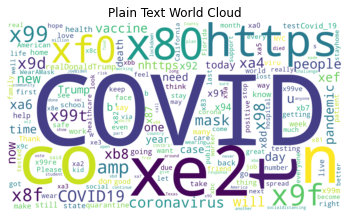

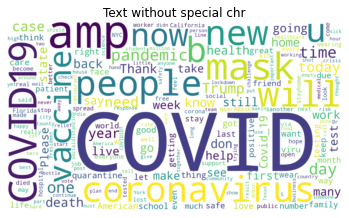

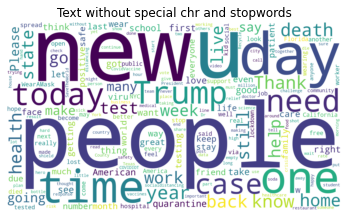

In [13]:
plt.imshow(VanillaWC, interpolation= 'bilinear')
plt.title('Plain Text World Cloud')
plt.axis('off')
plt.show()

plt.imshow(ParsedWC, interpolation= 'bilinear')
plt.title('Text without special chr')
plt.axis('off')
plt.show()

plt.imshow(CleanedWC, interpolation= 'bilinear')
plt.title('Text without special chr and stopwords')
plt.axis('off')
plt.show()

### Saving the word clouds

In [14]:
CleanedWC.to_file('wordCloud'+ start_date + '_' + end_date +'.png')